In [3]:
rm(list=ls())
library(readr)
df <- read_table("http://azzalini.stat.unipd.it/Book-DM/yesterday.dat")[-31,]


── Column specification ────────────────────────────────────────────────────────
cols(
  x = col_double(),
  y.yesterday = col_double(),
  y.tomorrow = col_double()
)



In [4]:
train <- data.frame(x = df$x, y = df$y.yesterday)

# compute MSE.tr
n <- nrow(train)
ds <- 1:15
ps <- ds + 1
x <- seq(.5,3,length=30)
fun <- function(d) if (d==0) lm(y~1, train) else lm(y~poly(x,degree=d), train)
fits <- lapply(ds, fun)
MSEs.tr <- unlist( lapply(fits, deviance) )/n

# compute ErrF
sigmatrue <- 0.01
ftrue <- c(0.4342, 0.4780, 0.5072, 0.5258, 0.5369, 0.5426, 0.5447, 0.5444, 0.5425, 0.5397, 0.5364, 0.5329, 0.5294, 0.5260, 0.5229, 0.5200, 0.5174, 0.5151, 0.5131, 0.5113, 0.5097, 0.5083, 0.5071, 0.5061, 0.5052, 0.5044, 0.5037, 0.5032, 0.5027, 0.5023)
x <- seq(.5, 3, length=30)
Bias2s <- sapply(ps,  function(p)
  mean( ( ftrue - fitted(lm(ftrue ~ poly(x, degree = (p-1)))) )^2 )
)
Vars <- ps*(sigmatrue^2)/n
ErrFs <- Bias2s + Vars + sigmatrue^2

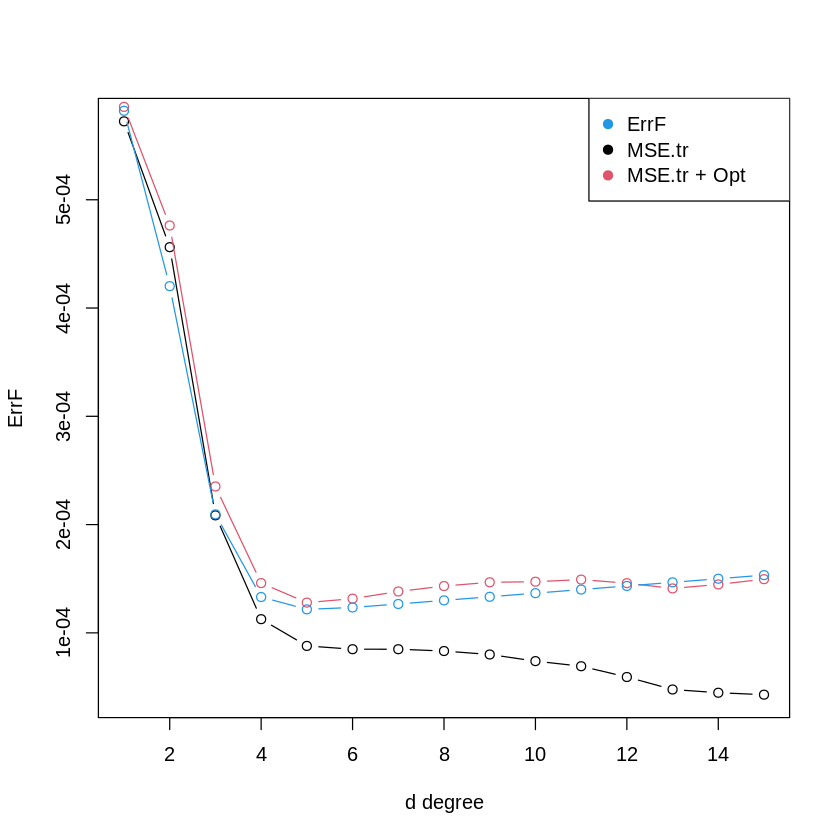

In [6]:
hatErrFs <- MSEs.tr + (2 * sigmatrue^2 * ps) / n
plot(ds, MSEs.tr, type = "b", xlab = "d degree", ylab = "ErrF")
lines(ds, hatErrFs, type  ="b", col = 2)
lines(ds, ErrFs, type = "b", col = 4)
legend("topright", c("ErrF", "MSE.tr", "MSE.tr + Opt"),
       col = c(4, 1, 2), pch = 19)

In [8]:
ps[which.min(hatErrFs)]

[1] 6

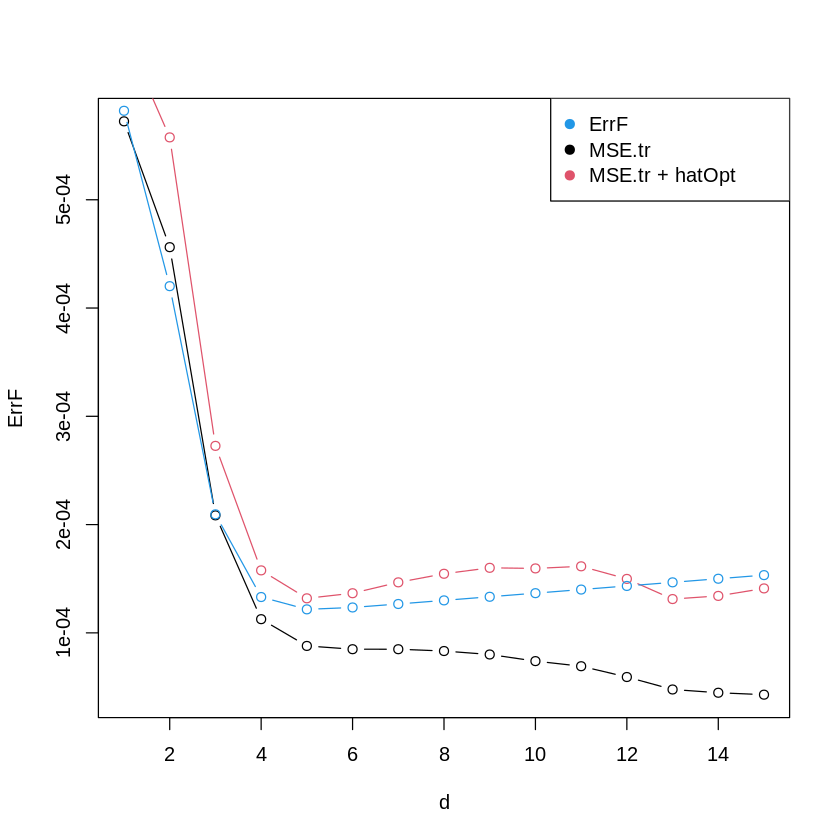

In [7]:
hatsigma2 <- (n * MSEs.tr)/(n - ps)
Cps <- MSEs.tr + (2 * hatsigma2 * ps) / n
plot(ds, MSEs.tr, type="b", xlab="d", ylab="ErrF")
lines(ds, Cps, type="b", col=2)
lines(ds, ErrFs, type="b", col=4)
legend("topright",c("ErrF","MSE.tr","MSE.tr + hatOpt"),
       col = c(4, 1, 2), pch = 19)

In [9]:
ds[which.min(Cps)]

[1] 13

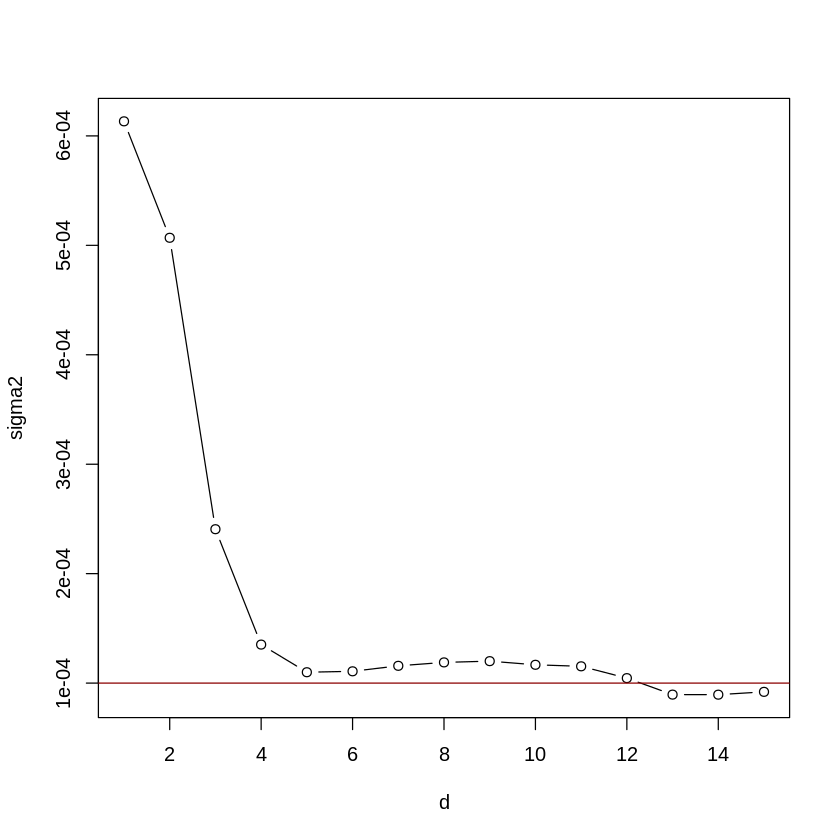

In [10]:
plot(ds, hatsigma2, type = "b", xlab = "d", ylab = "sigma2")
abline(h = sigmatrue^2, col = "red4")

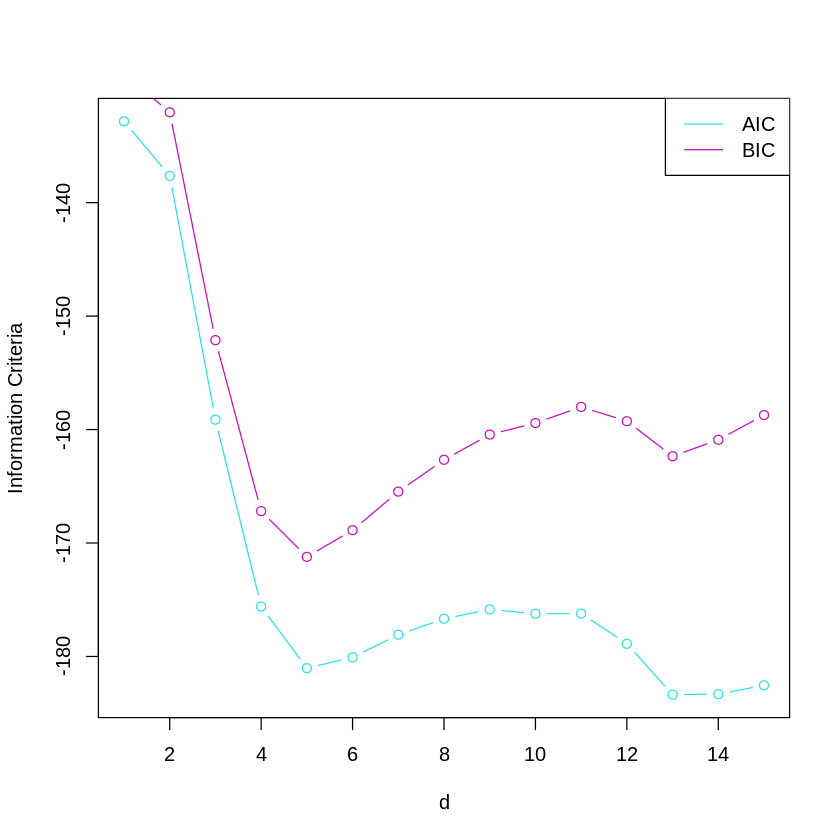

In [11]:
AICs <- unlist( lapply(fits, AIC) )
BICs <- unlist( lapply(fits, BIC) )
plot(ds, AICs, type="b", col=5, ylab="Information Criteria", xlab="d")
lines(ds, BICs, type="b", col=6)
legend("topright",c("AIC","BIC"), col=c(5, 6), lty = 1)

In [12]:
ps[which.min(AICs)]

[1] 14

In [13]:
ps[which.min(BICs)]

[1] 6